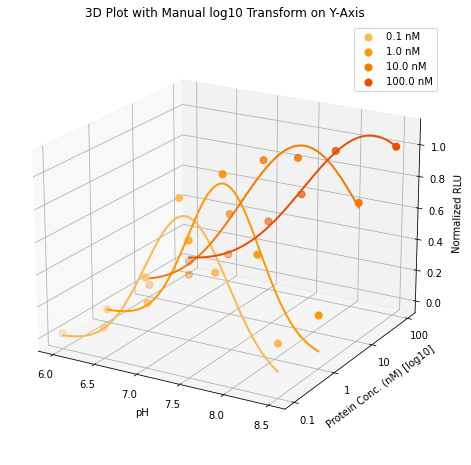

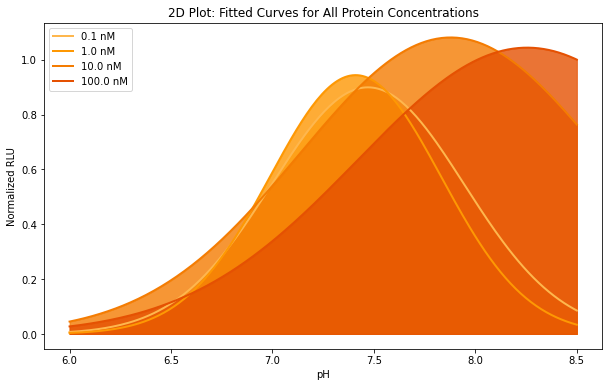

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# -----------------------------
# 1. Define the Data
# -----------------------------
pH = np.array([6.0, 6.5, 7.0, 7.4, 7.8, 8.5])
protein_conc = np.array([0.1, 1.0, 10.0, 100.0])  # in nM

# RLU matrix: rows = protein concentrations, columns = pH values.
RLU = np.array([
    [17.33333333,   94.66666667,  399.3333333,  827.6666667,  495.6666667,  212],
    [26.33333333,  517,          2765,         4995.333333,  2751.666667,  1276.666667],
    [56.33333333, 4042,         18532,        30861,        32538.33333,  25744.33333],
    [637.6666667, 60419,       220413.6667,  348727.6667,  534856,       588847.3333]
])

# -----------------------------
# 2. Correct Row-wise Normalization
# -----------------------------
# Divide each row by its maximum so each row's max becomes 1.
RLU_norm = RLU / np.max(RLU, axis=1, keepdims=True)

# -----------------------------
# 3. Manual Log Transform for Protein Conc.
# -----------------------------
# We'll plot log10(protein_conc) on the 3D y-axis,
# but label the ticks as 0.1, 1, 10, 100.
log_protein_conc = np.log10(protein_conc)

# Colors as requested:
# 0.1 nM: #feb74e
# 1 nM:   #fe9803
# 10 nM:  #f47c02
# 100 nM: #e55102
colors = ["#feb74e", "#fe9803", "#f47c02", "#e55102"]

# Gaussian function for fitting
def gaussian(x, mu, sigma, A):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# -----------------------------
# 4. Fit a Gaussian to Each Protein Concentration
# -----------------------------
x_fit = np.linspace(pH.min(), pH.max(), 200)
fit_params = []
fit_curves = []

for i in range(len(protein_conc)):
    x_data = pH
    y_data = RLU_norm[i, :]
    
    # Initial guesses: mu ~ 7, sigma ~ 1, amplitude ~ 1
    p0 = [7.0, 1.0, 1.0]
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=p0)
    fit_params.append(popt)
    fit_curves.append(gaussian(x_fit, *popt))

# -----------------------------
# 5. Create a True 3D Plot
# -----------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points and the fitted curves
for i, conc in enumerate(protein_conc):
    # For row i, the 'y' coordinate is log10(conc)
    y_val = log_protein_conc[i]
    
    # Plot original normalized data as scatter
    ax.scatter(pH,
               np.full_like(pH, y_val),
               RLU_norm[i, :],
               color=colors[i], s=50, label=f'{conc} nM')
    
    # Plot fitted curve as a line
    ax.plot(x_fit,
            np.full_like(x_fit, y_val),
            fit_curves[i],
            color=colors[i], lw=2)

# Label axes
ax.set_xlabel('pH')
ax.set_ylabel('Protein Conc. (nM) [log10]')
ax.set_zlabel('Normalized RLU')
ax.set_title('3D Plot with Manual log10 Transform on Y-Axis')

# Set custom tick locations for log scale
ax.set_yticks([-1, 0, 1, 2])  # log10 of [0.1, 1, 10, 100]
ax.set_yticklabels(['0.1', '1', '10', '100'])

# Adjust the view angle so it's clearly 3D
ax.view_init(elev=20, azim=-60)

ax.legend()
plt.show()

# -----------------------------
# 6. Create a 2D Plot Integrating All Protein Concentrations
# -----------------------------
fig2, ax2 = plt.subplots(figsize=(10, 6))

for i, conc in enumerate(protein_conc):
    ax2.plot(x_fit, fit_curves[i],
             color=colors[i], lw=2, label=f'{conc} nM')
    # Fill the area under each curve with alpha=0.8
    ax2.fill_between(x_fit, fit_curves[i],
                     color=colors[i], alpha=0.8)

ax2.set_xlabel('pH')
ax2.set_ylabel('Normalized RLU')
ax2.set_title('2D Plot: Fitted Curves for All Protein Concentrations')
ax2.legend()
plt.show()


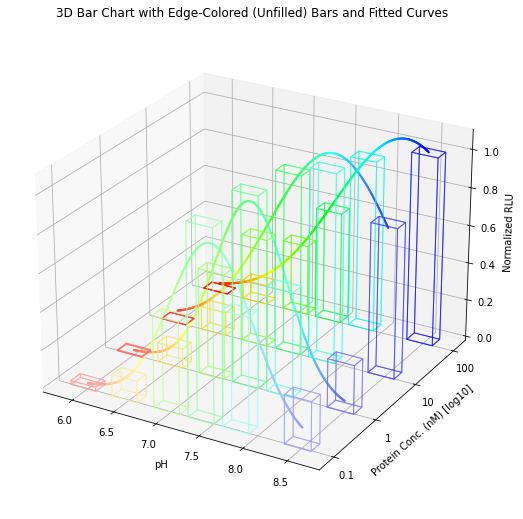

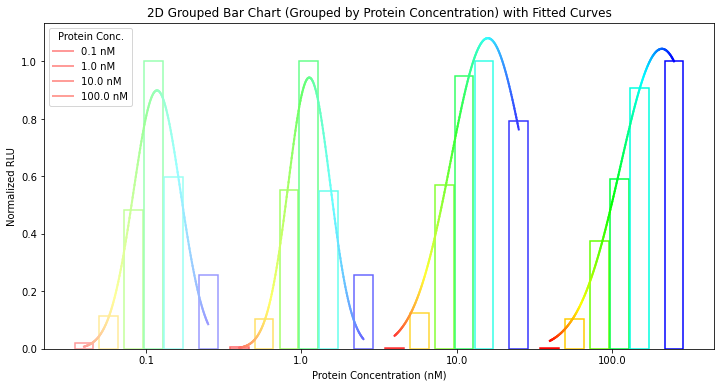

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting
from scipy.optimize import curve_fit
from matplotlib.colors import hsv_to_rgb

# -----------------------------
# 1. Data Definition and Normalization
# -----------------------------
pH = np.array([6.0, 6.5, 7.0, 7.4, 7.8, 8.5])
protein_conc = np.array([0.1, 1.0, 10.0, 100.0])  # in nM

# RLU matrix: rows correspond to protein concentrations, columns correspond to pH values.
RLU = np.array([
    [17.33333333,    94.66666667,   399.3333333,   827.6666667,   495.6666667,   212],
    [26.33333333,   517,           2765,          4995.333333,   2751.666667,   1276.666667],
    [56.33333333,  4042,          18532,         30861,         32538.33333,   25744.33333],
    [637.6666667, 60419,        220413.6667,   348727.6667,   534856,       588847.3333]
])
# Normalize each row by dividing by its maximum value.
RLU_norm = RLU / np.max(RLU, axis=1, keepdims=True)

# -----------------------------
# 2. Gaussian Fitting for Each Protein Concentration
# -----------------------------
def gaussian(x, mu, sigma, A):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

x_fit = np.linspace(pH.min(), pH.max(), 200)
fit_params = []
fit_curves = []
for i in range(len(protein_conc)):
    x_data = pH
    y_data = RLU_norm[i, :]
    p0 = [7.0, 1.0, 1.0]  # initial guesses for mu, sigma, A
    popt, _ = curve_fit(gaussian, x_data, y_data, p0=p0)
    fit_params.append(popt)
    fit_curves.append(gaussian(x_fit, *popt))

# -----------------------------
# 3. Define a Color Function that Adjusts Hue (pH) and Saturation (Protein Conc.)
# -----------------------------
def get_edge_color(pH_val, conc):
    """
    Maps a pH value and protein concentration to an edge color.
    - pH: 6.0 -> red (hue=0), 8.5 -> blue (hue ~ 0.67).
    - Protein concentration modulates saturation: low conc = lower saturation,
      high conc = higher saturation.
    """
    # Map pH to hue: linear interpolation from red to blue.
    t = (pH_val - 6.0) / (8.5 - 6.0)
    hue = t * 0.6667  # 0.6667 ~ 240°/360
    # Normalize protein concentration on log-scale (0.1 -> 0, 100 -> 1).
    norm_conc = (np.log10(conc) - np.log10(0.1)) / (np.log10(100) - np.log10(0.1))
    # Set saturation from 0.4 (low) to 1.0 (high); value fixed at 1.
    saturation = 0.4 + 0.6 * norm_conc
    value = 1.0
    rgb = hsv_to_rgb([hue, saturation, value])
    return tuple(rgb)

# -----------------------------
# 4. 3D Bar Chart with Transparent (Unfilled) Bars and Colored Edges
# -----------------------------
# In the 3D plot, we use a manual log10 transform for the protein concentration axis.
log_protein_conc = np.log10(protein_conc)  # e.g., 0.1-> -1, 1->0, 10->1, 100->2

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

dx = 0.3  # bar width in pH direction
dy = 0.2  # bar width in log(protein conc.) direction

# Use a fully transparent facecolor (RGBA with alpha 0) for an unfilled bar.
transparent_color = (1, 1, 1, 0)

for i, conc in enumerate(protein_conc):
    y_center = log_protein_conc[i]
    for j, p in enumerate(pH):
        height = RLU_norm[i, j]
        # Center the bar at (p, y_center)
        x0 = p - dx/2
        y0 = y_center - dy/2
        # Compute the edge color with desired alpha (0.6).
        edge_color = get_edge_color(p, conc)
        edge_color_rgba = edge_color + (0.6,)
        ax.bar3d(x0, y0, 0, dx, dy, height,
                 color=transparent_color,
                 edgecolor=edge_color_rgba)
        
# Overlay the fitted curves as segmented lines.
for i, conc in enumerate(protein_conc):
    y_val = log_protein_conc[i]
    for k in range(len(x_fit)-1):
        mid_pH = (x_fit[k] + x_fit[k+1]) / 2
        seg_color = get_edge_color(mid_pH, conc)
        ax.plot(x_fit[k:k+2],
                [y_val, y_val],
                fit_curves[i][k:k+2],
                color=seg_color, lw=2)

ax.set_xlabel('pH')
ax.set_ylabel('Protein Conc. (nM) [log10]')
ax.set_zlabel('Normalized RLU')
ax.set_title('3D Bar Chart with Edge-Colored (Unfilled) Bars and Fitted Curves')
ax.set_yticks([-1, 0, 1, 2])
ax.set_yticklabels(['0.1', '1', '10', '100'])
ax.view_init(elev=25, azim=-60)
plt.show()

# -----------------------------
# 5. 2D Grouped Bar Chart with Protein Concentration as x-axis
# -----------------------------
# In this 2D chart, the x-axis represents protein concentration groups.
# Within each group, bars (one per pH value) are positioned by mapping pH linearly.
group_centers = np.arange(len(protein_conc))  # groups: 0, 1, 2, 3
group_width = 0.8  # total horizontal space per group
num_pH = len(pH)

# Function to map a pH value to an offset within a group.
def map_pH_to_offset(p_val):
    return ((p_val - 6.0) / (8.5 - 6.0) - 0.5) * group_width

fig2, ax2 = plt.subplots(figsize=(12, 6))
bar_width = group_width / num_pH * 0.9  # bar width within each group

for i, conc in enumerate(protein_conc):
    center = group_centers[i]
    for j, p in enumerate(pH):
        xpos = center + map_pH_to_offset(p)
        height = RLU_norm[i, j]
        edge_color = get_edge_color(p, conc)
        # For 2D bars, set facecolor to 'none' to leave them unfilled.
        ax2.bar(xpos, height, width=bar_width,
                facecolor='none', edgecolor=edge_color, linewidth=1.5)
    
    # Overlay fitted curve for each protein concentration.
    x_curve = center + ((x_fit - 6.0) / (8.5 - 6.0) - 0.5) * group_width
    y_curve = fit_curves[i]
    for k in range(len(x_fit)-1):
        mid_pH = (x_fit[k] + x_fit[k+1]) / 2
        seg_color = get_edge_color(mid_pH, conc)
        ax2.plot(x_curve[k:k+2], y_curve[k:k+2], color=seg_color, lw=2)

ax2.set_xlabel('Protein Concentration (nM)')
ax2.set_ylabel('Normalized RLU')
ax2.set_title('2D Grouped Bar Chart (Grouped by Protein Concentration) with Fitted Curves')
ax2.set_xticks(group_centers)
ax2.set_xticklabels([str(c) for c in protein_conc])
ax2.legend([f'{c} nM' for c in protein_conc], title='Protein Conc.')
plt.show()


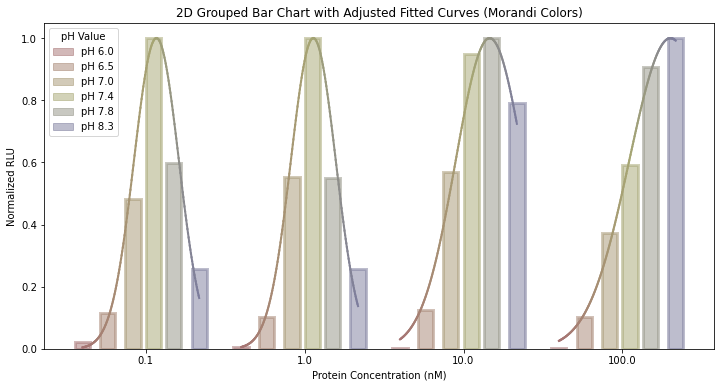

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

# -----------------------------
# 1. Data Definition and Row-wise Normalization
# -----------------------------
pH = np.array([6.0, 6.5, 7.0, 7.4, 7.8, 8.3])
protein_conc = np.array([0.1, 1.0, 10.0, 100.0])  # Each group represents one protein concentration

RLU = np.array([
    [17.33333333,   94.66666667,   399.3333333,   827.6666667,   495.6666667,   212],
    [26.33333333,   517,           2765,          4995.333333,   2751.666667,   1276.666667],
    [56.33333333,  4042,          18532,         30861,         32538.33333,   25744.33333],
    [637.6666667, 60419,       220413.6667,   348727.6667,   534856,       588847.3333]
])

# Normalize each row so that its maximum equals 1.
RLU_norm = RLU / np.max(RLU, axis=1, keepdims=True)

# -----------------------------
# 2. Fit a Gaussian to Each Protein Concentration & Normalize the Fitted Curve
# -----------------------------
def gaussian(x, mu, sigma, A):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

x_fit = np.linspace(pH.min(), pH.max(), 200)
fit_curves = []
for i in range(len(protein_conc)):
    popt, _ = curve_fit(gaussian, pH, RLU_norm[i, :], p0=[7.0, 1.0, 1.0])
    curve = gaussian(x_fit, *popt)
    curve_norm = curve / np.max(curve)  # Re-normalize so that max = 1
    fit_curves.append(curve_norm)

# -----------------------------
# 3. Define a Morandi-Style Color Function (Piecewise) for pH
# -----------------------------
def get_morandi_color(pH_val):
    """
    Returns a muted Morandi-style color based on pH:
      - For pH 6.0, returns a muted red (e.g., (0.8, 0.4, 0.4)).
      - For pH 7.4, returns a muted yellow (e.g., (0.8, 0.8, 0.4)).
      - For pH 8.5, returns a muted blue (e.g., (0.4, 0.4, 0.8)).
    Uses piecewise linear interpolation:
      pH 6.0 -> 7.4: interpolate red to yellow,
      pH 7.4 -> 8.5: interpolate yellow to blue.
    """
    if pH_val <= 7.4:
        t = (pH_val - 6.0) / (7.4 - 6.0)
        # Red (0.8, 0.4, 0.4) to Yellow (0.8, 0.8, 0.4)
        r = 0.8
        g = 0.4 * (1 - t) + 0.8 * t
        b = 0.4
        return (r, g, b)
    else:
        t = (pH_val - 7.4) / (8.5 - 7.4)
        # Yellow (0.8, 0.8, 0.4) to Blue (0.4, 0.4, 0.8)
        r = 0.8 * (1 - t) + 0.4 * t
        g = 0.8 * (1 - t) + 0.4 * t
        b = 0.4 * (1 - t) + 0.8 * t
        return (r, g, b)

# -----------------------------
# 4. Adjust the Fill Color: Blend 50% with Gray to Reduce Saturation
# -----------------------------
def adjust_fill_color(orig_color):
    """
    Blends the original color 50:50 with gray (0.5,0.5,0.5) to reduce saturation.
    """
    gray = np.array([0.5, 0.5, 0.5])
    new_color = tuple((np.array(orig_color) + gray) / 2)
    return new_color

# -----------------------------
# 5. Define Mapping Function for Bar Offsets within Each Protein Group
# -----------------------------
def map_pH_to_offset(p_val, group_width):
    """
    Maps a pH value (6.0 to 8.5) to a horizontal offset within a group.
    The range is linearly mapped to [-group_width/2, group_width/2].
    """
    return ((p_val - 6.0) / (8.5 - 6.0) - 0.5) * group_width

# -----------------------------
# 6. Create the 2D Grouped Bar Chart with Overlaid Fitted Curves
# -----------------------------
group_centers = np.arange(len(protein_conc))  # e.g., [0, 1, 2, 3]
group_width = 0.8  # Total horizontal space allocated for each group
num_pH = len(pH)
# Make the bar 20% narrower than before:
bar_width = group_width / num_pH * 0.9 * 0.8  # reduce width by 20%

fig, ax = plt.subplots(figsize=(12, 6))

for i, conc in enumerate(protein_conc):
    center = group_centers[i]
    for j, p in enumerate(pH):
        xpos = center + map_pH_to_offset(p, group_width)
        height = RLU_norm[i, j]
        base_color = get_morandi_color(p)
        fill_color = adjust_fill_color(base_color)
        # Draw the bar: fill with 50% transparency and outline 2x thicker.
        ax.bar(xpos, height, width=bar_width,
               facecolor=fill_color, alpha=0.5,
               edgecolor=fill_color, linewidth=3.0)
    
    # Overlay the fitted curve for this group.
    # Map x_fit values to x positions within the group.
    x_curve = center + ((x_fit - 6.0) / (8.5 - 6.0) - 0.5) * group_width
    y_curve = fit_curves[i]
    # Plot the fitted curve in segments with the adjusted color.
    for k in range(len(x_fit) - 1):
        mid_pH = (x_fit[k] + x_fit[k + 1]) / 2
        seg_color = adjust_fill_color(get_morandi_color(mid_pH))
        ax.plot(x_curve[k:k+2], y_curve[k:k+2], color=seg_color, lw=2)

ax.set_xlabel('Protein Concentration (nM)')
ax.set_ylabel('Normalized RLU')
ax.set_title('2D Grouped Bar Chart with Adjusted Fitted Curves (Morandi Colors)')
ax.set_xticks(group_centers)
ax.set_xticklabels([str(c) for c in protein_conc])

# -----------------------------
# 7. Create a Legend for pH Colors
# -----------------------------
legend_handles = []
for p in pH:
    base = get_morandi_color(p)
    leg_color = adjust_fill_color(base)
    patch = mpatches.Patch(color=leg_color, label=f'pH {p}', alpha=0.5)
    legend_handles.append(patch)
ax.legend(handles=legend_handles, title='pH Value', loc='upper left')

plt.show()
